### Problem 2: CART - RF - ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

Attribute Information:

1. Target: Claim Status (Claimed)
2. Code of tour firm (Agency_Code)
3. Type of tour insurance firms (Type)
4. Distribution channel of tour insurance agencies (Channel)
5. Name of the tour insurance products (Product Name)
6. Duration of the tour (Duration)
7. Destination of the tour (Destination)
8. Amount of sales of tour insurance policies (Sales)
9. The commission received for tour insurance firm (Commission)
10. Age of insured (Age)

In [3]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# Import stats from scipy
from scipy import stats

### Question 2.1) Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Answer 2.1:
    
### Performing Basic Data Exploration:
In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:

- Head of the dataset
- Shape of the dataset
- Info of the dataset
- Summary of the dataset

**We will  be loading the given Data file using pandas.**
    


In [4]:
df=pd.read_csv('insurance_part2_data.csv')

In [5]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


**Head function will tell the top records in the data set. By default python shows you only top 5 records.**

In [6]:
df.shape

(3000, 10)

**Shape function attribute tells us number of observations and variables we have in the data set. It is used to check the dimension of data. The data set has 3000 observations and 10 variables in the data set.**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


**info() is being used to check the Information about the data and the data types of each respective attributes.**

**The following are the observation:**
- Total of 10 variables
- Age, Commision, Duration, Sales are numeric variables
- Others are categorical variables
- There is no no missing value in the dataset
- 9 independant variable and one target variable - Claimed

In [8]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

**There is no no missing value in the dataset**

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000,NaN,NaN,NaN,38.091,10.4635,8,32,36,42,84
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000,NaN,NaN,NaN,14.5292,25.4815,0,0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000,NaN,NaN,NaN,70.0013,134.053,-1,11,26.5,63,4580
Sales,3000,NaN,NaN,NaN,60.2499,70.734,0,20,33,69,539
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**The following are the observation from basic descriptive stats:**
- Duration has negative value, which may be a wrong entry into the dataset.
- All the numerical variables have wide range (max - min).
- The mean and median of Commision & Sales lie apart which denotes that the data is skewed.
- The categorical variable 'Destination' has maximum unique count of 5.

In [11]:
df['Duration'].value_counts()    # Before imputing

 8       83
 5       82
 6       81
 10      81
 11      81
         ..
 466      1
 421      1
-1        1
 119      1
 4580     1
Name: Duration, Length: 257, dtype: int64

#### So, we have seen that there is only one data in Duration which is -1. We will try to impute it with median value as per best practice. Moreover, duration has outliers, which may affect the Mean. So, instead of Mean, median is preferred as imputation.

In [12]:
df["Duration"].median()

26.5

In [13]:
df.Duration.replace(-1,df["Duration"].median(),inplace=True)

In [14]:
df['Duration'].value_counts()   # After imputing

8.0      83
5.0      82
10.0     81
6.0      81
11.0     81
         ..
204.0     1
190.0     1
160.0     1
180.0     1
239.0     1
Name: Duration, Length: 257, dtype: int64

### Checking for duplicate data :

In [15]:
df.duplicated().sum()

139

#### Though it shows that there are 139 duplicate records, but in reality it can refer to different unique customers. Moreover, to check that,  there is no customer ID or any unique identifier available in the dataset. So, we are hereby keeping those records for analysis.

### Checking for Outliers

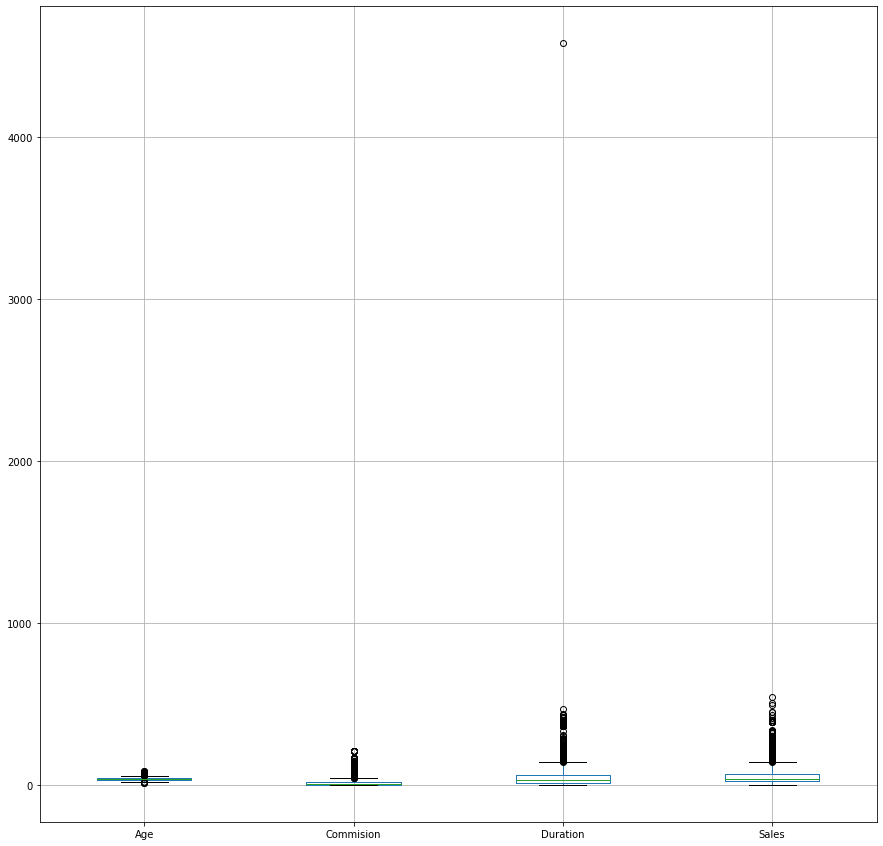

In [16]:
# construct box plot for continuous variables
plt.figure(figsize=(15,15))
df[['Age', 'Commision', 'Duration', 'Sales']].boxplot()

#### There are outliers in all the numerical variables, specially Duration has a extraordinary outlier value. Though CART and Random Forest can handle outliers in their independent variables, still we will treat the outliers which will be valid for all the models specially for ANN. 


### Treating the Outliers

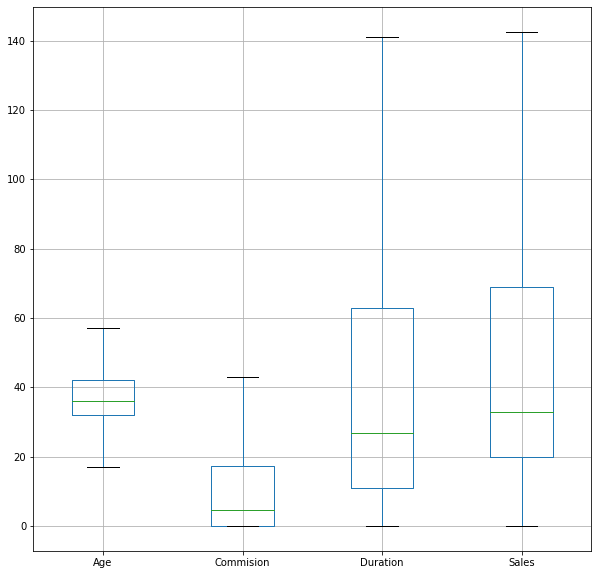

In [17]:
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range, upper_range


for feature in df[['Age', 'Commision', 'Duration', 'Sales']]: 
    lr,ur=treat_outlier(df[feature])
    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr,lr,df[feature])
    
plt.figure(figsize=(10,10))
df[['Age', 'Commision', 'Duration', 'Sales']].boxplot()

#### There are no outliers after treating them.

### Checking pairwise distribution of the continuous variables

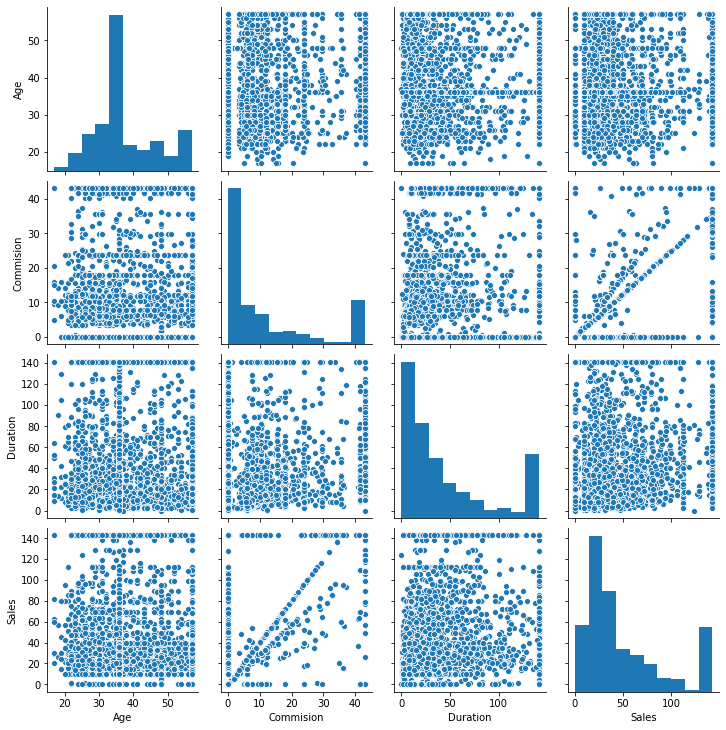

In [18]:
sns.pairplot(df[['Age', 'Commision', 'Duration', 'Sales']])

### Checking for Correlations

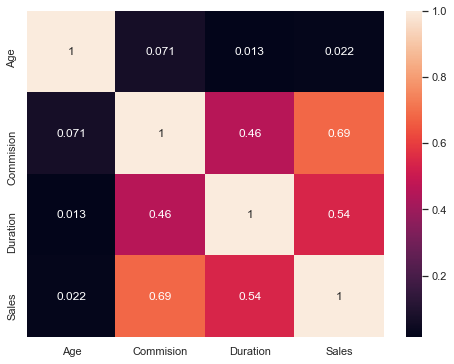

In [19]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1)
sns.heatmap(df[['Age', 'Commision', 'Duration', 'Sales']].corr(), annot=True)

#### Age, Commision, Duration are all moderately positively corelated.

### Checking for Categorical Variables

In [20]:
for column in df[['Agency_Code', 'Type', 'Claimed', 'Channel', 
                  'Product Name', 'Destination']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64




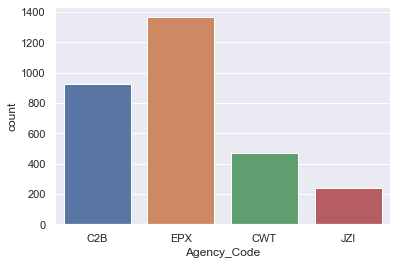

In [21]:
sns.countplot(data = df, x = 'Agency_Code')

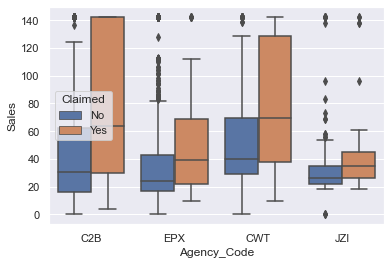

In [22]:
sns.boxplot(x="Agency_Code", y="Sales", hue = "Claimed", data = df)

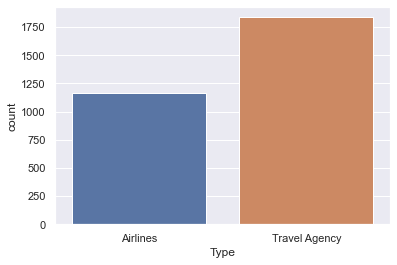

In [23]:
sns.countplot(data = df, x = 'Type')

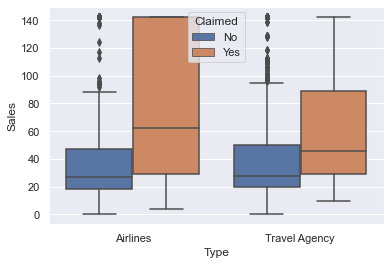

In [24]:
sns.boxplot(data = df, x='Type',y='Sales', hue='Claimed')

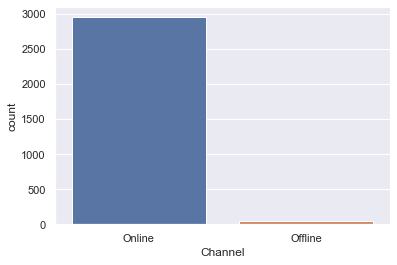

In [25]:
sns.countplot(data = df, x = 'Channel')

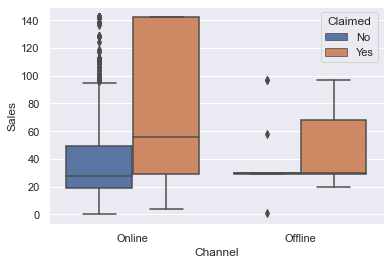

In [26]:
sns.boxplot(data = df, x='Channel',y='Sales', hue='Claimed')

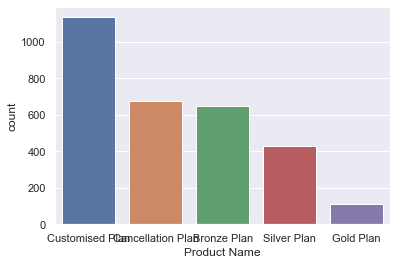

In [27]:
sns.countplot(data = df, x = 'Product Name')

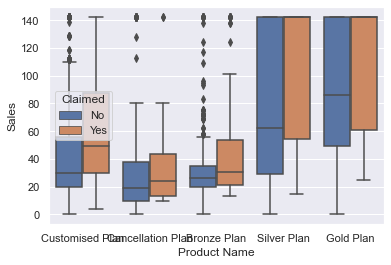

In [28]:
sns.boxplot(data = df, x='Product Name',y='Sales', hue='Claimed')

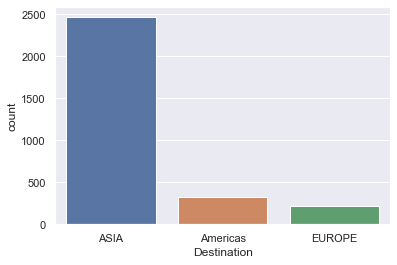

In [29]:
sns.countplot(data = df, x = 'Destination')

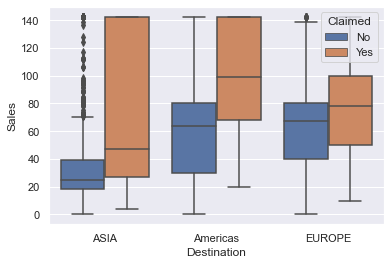

In [30]:
sns.boxplot(data = df, x='Destination',y='Sales', hue='Claimed')

### Converting all objects to categorical codes

In [31]:
for feature in df.columns: 
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature]).codes 
        
df.head(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0,0.00,1,34.0,20.00,2,0
2,39.0,1,1,0,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0,0.00,1,4.0,26.00,1,0
4,33.0,3,0,0,6.30,1,53.0,18.00,0,0
5,45.0,3,0,1,15.75,1,8.0,45.00,0,0
6,57.0,1,1,0,35.64,1,30.0,59.40,2,1
7,36.0,2,1,0,0.00,1,16.0,80.00,1,0
8,36.0,2,1,0,0.00,1,19.0,14.00,1,0
9,36.0,2,1,0,0.00,1,42.0,43.00,1,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   float64
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   float64
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(4), int8(6)
memory usage: 111.5 KB


#### It has been seen that all the object type variables are converted to categorical with distinct value (code).

### Proportion of 1s and 0s of Dependent variable 'Claimed'

In [33]:
df.Claimed.value_counts()

0    2076
1     924
Name: Claimed, dtype: int64

In [34]:
df.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

### Question 2.2) Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Answer 2.2:
    
#### We should capture the target column into separate vectors for training set and test set first.


In [35]:
X = df.drop("Claimed", axis=1)

y = df.pop("Claimed")

X.head()


,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0.00,1,34.0,20.00,2,0
2,39.0,1,1,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0.00,1,4.0,26.00,1,0
4,33.0,3,0,6.30,1,53.0,18.00,0,0


### Feature Scaling

#### We have to scale the features as the magnitude of different features are different which may affect the model performance.

In [36]:
from scipy.stats import zscore
X=X.apply(zscore)
X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,1.146411,-1.314358,-1.256796,-0.696062,0.124788,-0.840399,-1.120660,0.268835,-0.434646
1,-0.172988,0.697928,0.795674,-0.742656,0.124788,-0.246164,-0.706281,0.268835,-0.434646
2,0.156862,-0.308215,0.795674,-0.347272,0.124788,-0.928434,-0.945573,0.268835,1.303937
3,-0.172988,0.697928,0.795674,-0.742656,0.124788,-0.906425,-0.564127,-0.525751,-0.434646
4,-0.502838,1.704071,-1.256796,-0.323309,0.124788,0.172002,-0.753665,-1.320338,-0.434646


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">  Splitting the data into Train and Test set:

#### We will split the dataset into 70% training data and 30% of testing data.

In [37]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.30, random_state = 5)

#### Checking the dimensions of the training and test data

In [38]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)


X_train (2100, 9)
X_test (900, 9)
y_train (2100,)
y_test (900,)


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Building a Decision Tree Classifier Model and fit it on the Training Set:

#### Building a basic Decision Tree and looking for Prunning opportunity

In [39]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [40]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Insurance_Tree_File = open('Insurance_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Insurance_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Insurance_Tree_File.close()

http://webgraphviz.com/

In [42]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Duration      0.258348
Sales         0.209877
Agency_Code   0.203467
Age           0.171200
Commision     0.079624
Product Name  0.051964
Destination   0.018241
Channel       0.007280
Type          0.000000


#### Regularising the Decision Tree - PRUNNING

In [43]:
reg_dt_model_1 = DecisionTreeClassifier(criterion = 'gini', 
                                        max_depth = 10,
                                        min_samples_leaf=100,
                                        min_samples_split=450,
                                        random_state=1)
reg_dt_model_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=450, random_state=1)

In [44]:
print (pd.DataFrame(reg_dt_model_1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.717504
Sales         0.174537
Product Name  0.098025
Commision     0.006411
Duration      0.003523
Age           0.000000
Type          0.000000
Channel       0.000000
Destination   0.000000


#### So, it is observed that after prunning, the feature importance values have been changed. So, there may be some more iterations required to come to an overall balanced prunned tree.

In [45]:
reg_dt_model_2 = DecisionTreeClassifier(criterion = 'gini', 
                                        max_depth = 10,
                                        min_samples_leaf= 150,
                                        min_samples_split= 300,
                                        random_state=1)

reg_dt_model_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=150,
                       min_samples_split=300, random_state=1)

In [46]:
print (pd.DataFrame(reg_dt_model_2.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.672031
Sales         0.204696
Product Name  0.091813
Duration      0.017383
Commision     0.014077
Age           0.000000
Type          0.000000
Channel       0.000000
Destination   0.000000


In [47]:
reg_dt_model_3 = DecisionTreeClassifier(criterion = 'gini', 
                                        max_depth = 5,
                                        min_samples_leaf=50,
                                        min_samples_split=250,
                                        random_state=1)

reg_dt_model_3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=250,
                       random_state=1)

In [48]:
print (pd.DataFrame(reg_dt_model_3.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.628178
Sales         0.218832
Product Name  0.085821
Duration      0.024270
Commision     0.021676
Age           0.021223
Type          0.000000
Channel       0.000000
Destination   0.000000


#### SO, we have 3 different sets of prunning parameters for the DT and we will check the accuracy and performance of the model later.

### Predicting on Training and Test dataset

In [49]:
# predicting for Model - 1 : "reg_dt_model_1"

ytrain_predict_1 = reg_dt_model_1.predict(X_train)
ytest_predict_1 = reg_dt_model_1.predict(X_test)

# predicting for Model - 1 : "reg_dt_model_2"

ytrain_predict_2 = reg_dt_model_2.predict(X_train)
ytest_predict_2 = reg_dt_model_2.predict(X_test)

# predicting for Model - 1 : "reg_dt_model_3"

ytrain_predict_3 = reg_dt_model_3.predict(X_train)
ytest_predict_3 = reg_dt_model_3.predict(X_test)

### Getting the Predicted Classes and Probs

In [50]:
ytrain_predict2 = reg_dt_model_1.predict_proba(X_train)
ytest_predict2 = reg_dt_model_1.predict_proba(X_test)

In [51]:
ytrain_predict2

array([[0.97409326, 0.02590674],
       [0.65675057, 0.34324943],
       [0.65675057, 0.34324943],
       ...,
       [0.85185185, 0.14814815],
       [0.25077399, 0.74922601],
       [0.53395062, 0.46604938]])

In [52]:
ytest_predict2

array([[0.65675057, 0.34324943],
       [0.97409326, 0.02590674],
       [0.97409326, 0.02590674],
       ...,
       [0.65675057, 0.34324943],
       [0.91689751, 0.08310249],
       [0.53395062, 0.46604938]])

### Performance Checks for Prunned tree - 1 :   'reg_dt_model_1'

In [53]:
# Training data confusion matrix for reg_dt_model_1 


print("Confusion matrix for Training data \n", confusion_matrix(y_train, ytrain_predict_1))

# Testing data confusion matrix for reg_dt_model_1 

print ('\n')

print("Confusion matrix for Testing data \n", confusion_matrix(y_test, ytest_predict_1))

# Training Data Accuracy - for reg_dt_model_1

print ('\n')

print("Accuracy for Training Data \n", reg_dt_model_1.score(X_train,y_train))


# TESTING Data Accuracy - for reg_dt_model_1

print ('\n')

print("Accuracy for Testing Data \n", reg_dt_model_1.score(X_test,y_test))

print ('\n')

print ("Classification report for Training data")
print(classification_report(y_train, ytrain_predict_1))

print ('\n')

print ("Classification report for Testing data")
print(classification_report(y_test, ytest_predict_1))

Confusion matrix for Training data 
 [[1372   81]
 [ 405  242]]


Confusion matrix for Testing data 
 [[588  35]
 [180  97]]


Accuracy for Training Data 
 0.7685714285714286


Accuracy for Testing Data 
 0.7611111111111111


Classification report for Training data
              precision    recall  f1-score   support

           0       0.77      0.94      0.85      1453
           1       0.75      0.37      0.50       647

    accuracy                           0.77      2100
   macro avg       0.76      0.66      0.67      2100
weighted avg       0.77      0.77      0.74      2100



Classification report for Testing data
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       623
           1       0.73      0.35      0.47       277

    accuracy                           0.76       900
   macro avg       0.75      0.65      0.66       900
weighted avg       0.76      0.76      0.73       900



### Performance Checks for Prunned tree - 2 :     'reg_dt_model_2'

In [54]:
# Training data confusion matrix for reg_dt_model_2 


print("Confusion matrix for Training data \n", confusion_matrix(y_train, ytrain_predict_2))

# Testing data confusion matrix for reg_dt_model_2 

print ('\n')

print("Confusion matrix for Testing data \n", confusion_matrix(y_test, ytest_predict_2))

# Training Data Accuracy - for reg_dt_model_2

print ('\n')

print("Accuracy for Training Data \n", reg_dt_model_2.score(X_train,y_train))


# TESTING Data Accuracy - for reg_dt_model_2

print ('\n')

print("Accuracy for Testing Data \n", reg_dt_model_2.score(X_test,y_test))

print ('\n')

print ("Classification report for Training data")
print(classification_report(y_train, ytrain_predict_2))

print ('\n')

print ("Classification report for Testing data")
print(classification_report(y_test, ytest_predict_2))

Confusion matrix for Training data 
 [[1302  151]
 [ 315  332]]


Confusion matrix for Testing data 
 [[558  65]
 [141 136]]


Accuracy for Training Data 
 0.7780952380952381


Accuracy for Testing Data 
 0.7711111111111111


Classification report for Training data
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1453
           1       0.69      0.51      0.59       647

    accuracy                           0.78      2100
   macro avg       0.75      0.70      0.72      2100
weighted avg       0.77      0.78      0.77      2100



Classification report for Testing data
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       623
           1       0.68      0.49      0.57       277

    accuracy                           0.77       900
   macro avg       0.74      0.69      0.71       900
weighted avg       0.76      0.77      0.76       900



### Performance Checks for Prunned tree - 3 :     ' reg_dt_model_3 '

In [55]:
# Training data confusion matrix for reg_dt_model_3 


print("Confusion matrix for Training data \n", confusion_matrix(y_train, ytrain_predict_3))

# Testing data confusion matrix for reg_dt_model_3 

print ('\n')

print("Confusion matrix for Testing data \n", confusion_matrix(y_test, ytest_predict_3))

# Training Data Accuracy - for reg_dt_model_3

print ('\n')

print("Accuracy for Training Data \n", reg_dt_model_3.score(X_train,y_train))


# TESTING Data Accuracy - for reg_dt_model_3

print ('\n')

print("Accuracy for Testing Data \n", reg_dt_model_3.score(X_test,y_test))


print ('\n')

print ("Classification report for Training data")
print(classification_report(y_train, ytrain_predict_3))

print ('\n')

print ("Classification report for Testing data")
print(classification_report(y_test, ytest_predict_3))

Confusion matrix for Training data 
 [[1309  144]
 [ 307  340]]


Confusion matrix for Testing data 
 [[553  70]
 [136 141]]


Accuracy for Training Data 
 0.7852380952380953


Accuracy for Testing Data 
 0.7711111111111111


Classification report for Training data
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1453
           1       0.70      0.53      0.60       647

    accuracy                           0.79      2100
   macro avg       0.76      0.71      0.73      2100
weighted avg       0.78      0.79      0.78      2100



Classification report for Testing data
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       623
           1       0.67      0.51      0.58       277

    accuracy                           0.77       900
   macro avg       0.74      0.70      0.71       900
weighted avg       0.76      0.77      0.76       900



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Building a Random Forest Classifier Model:

### Instantiate the Random Forest Classifier Class

In [56]:
rfcl = RandomForestClassifier(n_estimators = 501, random_state=123)
rfcl = rfcl.fit(X_train, y_train)

### Grid Search for finding out the optimal values for the hyper parameters

In [57]:
param_grid_rfcl = {
    'max_depth': [5,10],
    'max_features': [3,5],
    'min_samples_leaf': [8,10,12],
    'min_samples_split': [40,50], 
    'n_estimators': [200,350]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 5)

In [58]:
grid_search_rfcl.fit(X_train, y_train)
print(grid_search_rfcl.best_params_)
best_grid_rfcl = grid_search_rfcl.best_estimator_
best_grid_rfcl

{'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 40, 'n_estimators': 200}


RandomForestClassifier(max_depth=5, max_features=5, min_samples_leaf=10,
                       min_samples_split=40, n_estimators=200, random_state=1)

### Predicting the Training and Testing data


In [59]:
ytrain_predict_rfcl = best_grid_rfcl.predict(X_train)
ytest_predict_rfcl = best_grid_rfcl.predict(X_test)

### Getting the Predicted Classes and Probs

In [60]:
ytest_predict_rfcl
ytest_predict_prob_rfcl=best_grid_rfcl.predict_proba(X_test)
ytest_predict_prob_rfcl
pd.DataFrame(ytest_predict_prob_rfcl).head()

,0,1
0,0.764696,0.235304
1,0.974033,0.025967
2,0.910251,0.089749
3,0.640296,0.359704
4,0.898440,0.101560


### RF Model Performance check on Training and testing data


In [61]:
confusion_matrix(y_train,ytrain_predict_rfcl)

array([[1296,  157],
       [ 253,  394]], dtype=int64)

In [62]:
# Training data confusion matrix  

print("Confusion matrix for Training data \n", confusion_matrix(y_train, ytrain_predict_rfcl))

# Testing data confusion matrix  

print ('\n')

print("Confusion matrix for Testing data \n", confusion_matrix(y_test, ytest_predict_rfcl))

# Training Data Accuracy 

print ('\n')

print("Accuracy for Training Data \n", best_grid_rfcl.score(X_train,y_train))


# TESTING Data Accuracy 

print ('\n')

print("Accuracy for Testing Data \n", best_grid_rfcl.score(X_test,y_test))


print ('\n')

print ("Classification report for Training data")
print(classification_report(y_train, ytrain_predict_rfcl))

print ('\n')

print ("Classification report for Testing data")
print(classification_report(y_test, ytest_predict_rfcl))

Confusion matrix for Training data 
 [[1296  157]
 [ 253  394]]


Confusion matrix for Testing data 
 [[547  76]
 [118 159]]


Accuracy for Training Data 
 0.8047619047619048


Accuracy for Testing Data 
 0.7844444444444445


Classification report for Training data
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1453
           1       0.72      0.61      0.66       647

    accuracy                           0.80      2100
   macro avg       0.78      0.75      0.76      2100
weighted avg       0.80      0.80      0.80      2100



Classification report for Testing data
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       623
           1       0.68      0.57      0.62       277

    accuracy                           0.78       900
   macro avg       0.75      0.73      0.74       900
weighted avg       0.78      0.78      0.78       900



### Variable Importance for RF model

In [63]:
print (pd.DataFrame(best_grid_rfcl.feature_importances_, 
                    columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.386375
Product Name  0.225706
Sales         0.154557
Commision     0.094744
Duration      0.058684
Type          0.038072
Age           0.035122
Destination   0.005296
Channel       0.001444


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Building a Neural Network Classifier Model:

### Instantiate the Neural Network Classifier Class

### AND

#### ITERATING OVER the parameters to get a converged solution and similar accuracy for test and training data

In [64]:
mlp = MLPClassifier(hidden_layer_sizes=300, max_iter=6000,
                     solver='sgd', verbose=True,  random_state=1 , tol=0.001)

In [65]:
mlp.fit(X_train,y_train)

Iteration 1, loss = 0.66573059
Iteration 2, loss = 0.64849097
Iteration 3, loss = 0.62812079
Iteration 4, loss = 0.60993288
Iteration 5, loss = 0.59388491
Iteration 6, loss = 0.58035932
Iteration 7, loss = 0.56885328
Iteration 8, loss = 0.55912415
Iteration 9, loss = 0.55116957
Iteration 10, loss = 0.54377117
Iteration 11, loss = 0.53761188
Iteration 12, loss = 0.53236002
Iteration 13, loss = 0.52769198
Iteration 14, loss = 0.52367272
Iteration 15, loss = 0.52009735
Iteration 16, loss = 0.51692588
Iteration 17, loss = 0.51407527
Iteration 18, loss = 0.51160636
Iteration 19, loss = 0.50941780
Iteration 20, loss = 0.50745047
Iteration 21, loss = 0.50566344
Iteration 22, loss = 0.50405655
Iteration 23, loss = 0.50264280
Iteration 24, loss = 0.50130676
Iteration 25, loss = 0.50007782
Iteration 26, loss = 0.49894402
Iteration 27, loss = 0.49799576
Iteration 28, loss = 0.49700184
Iteration 29, loss = 0.49616951
Iteration 30, loss = 0.49541872
Iteration 31, loss = 0.49470637
Iteration 32, los

MLPClassifier(hidden_layer_sizes=300, max_iter=6000, random_state=1,
              solver='sgd', tol=0.001, verbose=True)

### OR we can use Grid search for finding out the optimal values

In [66]:
param_grid_mlp = {
    'hidden_layer_sizes': [50,100,200,300],
    'max_iter': [2500,3000,5000], 
    'solver': ['sgd'],
    'tol': [0.001], 
}

mlp = MLPClassifier(random_state=1)

grid_search_mlp = GridSearchCV(estimator = mlp, param_grid = param_grid_mlp, cv = 10)

In [67]:
grid_search_mlp.fit(X_train, y_train)
grid_search_mlp.best_params_
best_grid_mlp = grid_search_mlp.best_estimator_
best_grid_mlp

MLPClassifier(hidden_layer_sizes=200, max_iter=2500, random_state=1,
              solver='sgd', tol=0.001)

### Predicting the Training and Testing data

In [68]:
ytrain_predict_mlp = best_grid_mlp.predict(X_train)
ytest_predict_mlp = best_grid_mlp.predict(X_test)

### Neural Network Model Performance check on Training and testing data

In [69]:
# Training data confusion matrix  

print("Confusion matrix for Training data \n", confusion_matrix(y_train, ytrain_predict_mlp))

# Testing data confusion matrix  

print ('\n')

print("Confusion matrix for Testing data \n", confusion_matrix(y_test,ytest_predict_mlp))

# Training Data Accuracy 

print ('\n')

print("Accuracy for Training Data \n", best_grid_mlp.score(X_train,y_train))


# TESTING Data Accuracy 

print ('\n')

print("Accuracy for Testing Data \n", best_grid_mlp.score(X_test,y_test))


print ('\n')

print ("Classification report for Training data")
print(classification_report(y_train, ytrain_predict_mlp))

print ('\n')

print ("Classification report for Testing data")
print(classification_report(y_test, ytest_predict_mlp))

Confusion matrix for Training data 
 [[1337  116]
 [ 362  285]]


Confusion matrix for Testing data 
 [[566  57]
 [157 120]]


Accuracy for Training Data 
 0.7723809523809524


Accuracy for Testing Data 
 0.7622222222222222


Classification report for Training data
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      1453
           1       0.71      0.44      0.54       647

    accuracy                           0.77      2100
   macro avg       0.75      0.68      0.70      2100
weighted avg       0.76      0.77      0.75      2100



Classification report for Testing data
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       623
           1       0.68      0.43      0.53       277

    accuracy                           0.76       900
   macro avg       0.73      0.67      0.68       900
weighted avg       0.75      0.76      0.74       900



### Question 2.3) Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Answer 2.3:

### Checking the Metrics for Predictions on the Training set

#### [Accuracy Score, Classification Report, Confusion Matrix]

In [70]:
models=[reg_dt_model_3,best_grid_rfcl,best_grid_mlp]
models_names={reg_dt_model_3:'DecisionTreeClassifier',best_grid_rfcl:'RandomForestClassifier', best_grid_mlp:'ANN'}

Accuracy for DecisionTreeClassifier model is 
 0.7852380952380953


Classification report for DecisionTreeClassifier model is 
               precision    recall  f1-score   support

           0       0.81      0.90      0.85      1453
           1       0.70      0.53      0.60       647

    accuracy                           0.79      2100
   macro avg       0.76      0.71      0.73      2100
weighted avg       0.78      0.79      0.78      2100



Confusion Matrix for DecisionTreeClassifier model is


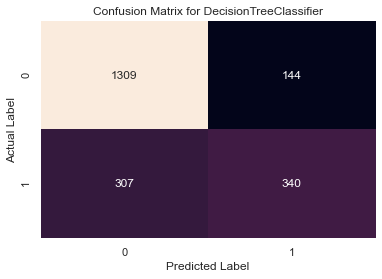

Accuracy for RandomForestClassifier model is 
 0.8047619047619048


Classification report for RandomForestClassifier model is 
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1453
           1       0.72      0.61      0.66       647

    accuracy                           0.80      2100
   macro avg       0.78      0.75      0.76      2100
weighted avg       0.80      0.80      0.80      2100



Confusion Matrix for RandomForestClassifier model is


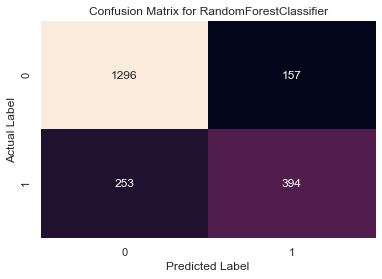

Accuracy for ANN model is 
 0.7723809523809524


Classification report for ANN model is 
               precision    recall  f1-score   support

           0       0.79      0.92      0.85      1453
           1       0.71      0.44      0.54       647

    accuracy                           0.77      2100
   macro avg       0.75      0.68      0.70      2100
weighted avg       0.76      0.77      0.75      2100



Confusion Matrix for ANN model is


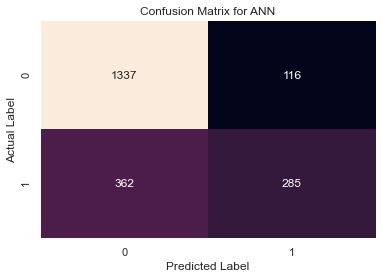

In [71]:
for i in models:
    i.fit(X_train,y_train)
    print('Accuracy for {} model is'.format(models_names[i]),'\n',accuracy_score(y_train,i.predict(X_train)))
    print('\n')
    print('Classification report for {} model is'.format(models_names[i]),'\n',classification_report(y_train,i.predict(X_train)))
    print('\n')
    print('Confusion Matrix for {} model is'.format(models_names[i]))
    sns.heatmap(confusion_matrix(y_train,i.predict(X_train)),annot=True,fmt='d',cbar=False)
    plt.title('Confusion Matrix for {}'.format(models_names[i]))
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

### Checking the Metrics for Predictions on the Testing set

#### [Accuracy Score, Classification Report, Confusion Matrix]

Accuracy for DecisionTreeClassifier model is 
 0.7711111111111111


Classification report for DecisionTreeClassifier model is 
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       623
           1       0.67      0.51      0.58       277

    accuracy                           0.77       900
   macro avg       0.74      0.70      0.71       900
weighted avg       0.76      0.77      0.76       900



Confusion Matrix for DecisionTreeClassifier model is


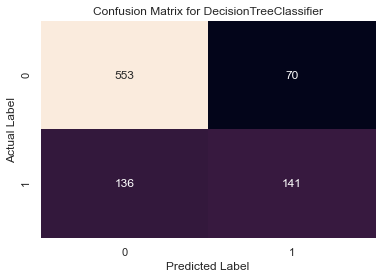

Accuracy for RandomForestClassifier model is 
 0.7844444444444445


Classification report for RandomForestClassifier model is 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       623
           1       0.68      0.57      0.62       277

    accuracy                           0.78       900
   macro avg       0.75      0.73      0.74       900
weighted avg       0.78      0.78      0.78       900



Confusion Matrix for RandomForestClassifier model is


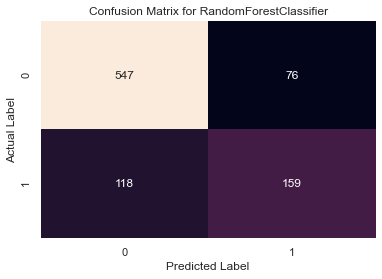

Accuracy for ANN model is 
 0.7622222222222222


Classification report for ANN model is 
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       623
           1       0.68      0.43      0.53       277

    accuracy                           0.76       900
   macro avg       0.73      0.67      0.68       900
weighted avg       0.75      0.76      0.74       900



Confusion Matrix for ANN model is


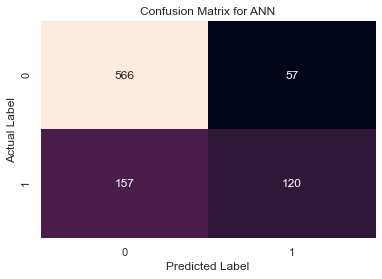

In [72]:
for i in models:
    i.fit(X_train,y_train)
    print('Accuracy for {} model is'.format(models_names[i]),'\n',accuracy_score(y_test,i.predict(X_test)))
    print('\n')
    print('Classification report for {} model is'.format(models_names[i]),'\n',classification_report(y_test,i.predict(X_test)))
    print('\n')
    print('Confusion Matrix for {} model is'.format(models_names[i]))
    sns.heatmap(confusion_matrix(y_test,i.predict(X_test)),annot=True,fmt='d',cbar=False)
    plt.title('Confusion Matrix for {}'.format(models_names[i]))
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

### Decision Tree - AUC and ROC for the Training data

Area under Curve (AUC) is: 0.825


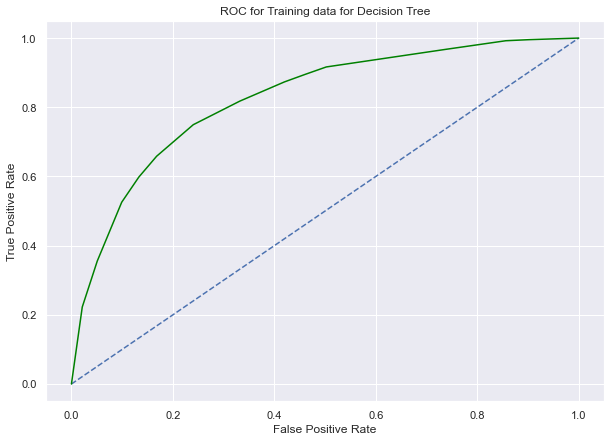

In [73]:
plt.figure(figsize=(10,7))
probs_cart = reg_dt_model_3.predict_proba(X_train)
probs_cart = probs_cart[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs_cart)
print('Area under Curve (AUC) is: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(cart_train_fpr, cart_train_tpr,color='green')
plt.title('ROC for Training data for Decision Tree')
plt.show()

### Decision Tree - AUC and ROC for the Testing data

Area under Curve (AUC) is: 0.801


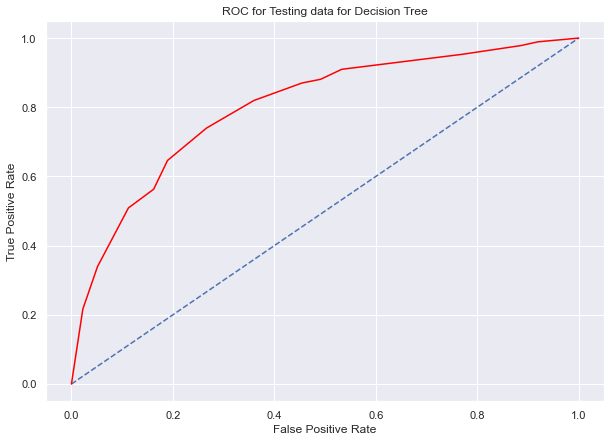

In [74]:
plt.figure(figsize=(10,7))
probs_cart_t = reg_dt_model_3.predict_proba(X_test)
probs_cart_t = probs_cart_t[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs_cart_t)
print('Area under Curve (AUC) is: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs_cart_t)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(cart_test_fpr, cart_test_tpr,color='Red')
plt.title('ROC for Testing data for Decision Tree')
plt.show()

### RANDOM FOREST - AUC and ROC for the Training data

Area under Curve (AUC) is 0.8521909049230341


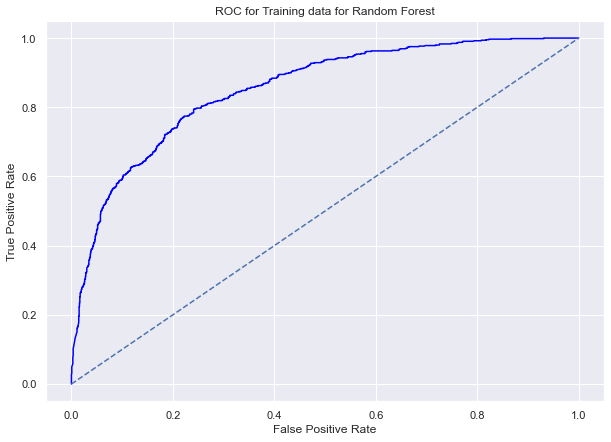

In [75]:

rf_train_fpr, rf_train_tpr,_=roc_curve(y_train,best_grid_rfcl.predict_proba(X_train)[:,1])

rf_train_auc=roc_auc_score(y_train,best_grid_rfcl.predict_proba(X_train)[:,1])
print('Area under Curve (AUC) is', rf_train_auc)
plt.figure(figsize=(10,7))
plt.plot(rf_train_fpr,rf_train_tpr,color='blue')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Training data for Random Forest')
plt.show()


### RANDOM FOREST - AUC and ROC for the Testing data

Area under Curve (AUC) is 0.8178836536845704


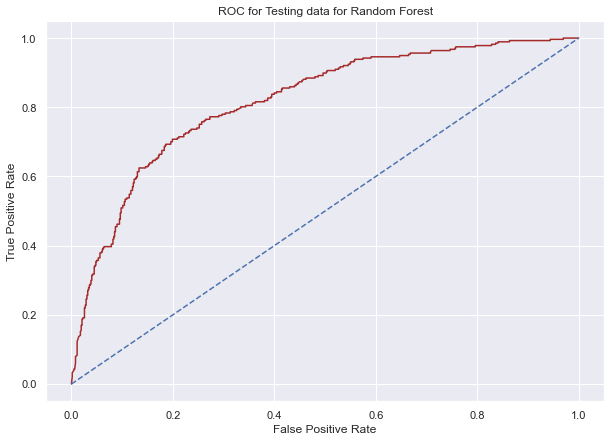

In [76]:
rf_test_fpr, rf_test_tpr,_=roc_curve(y_test,best_grid_rfcl.predict_proba(X_test)[:,1])
rf_test_auc=roc_auc_score(y_test,best_grid_rfcl.predict_proba(X_test)[:,1])
print('Area under Curve (AUC) is', rf_test_auc)
plt.figure(figsize=(10,7))
plt.plot(rf_test_fpr,rf_test_tpr,color='brown')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Testing data for Random Forest')
plt.show()

### NEURAL NETWORK - AUC and ROC for the Training data

Area under Curve (AUC) is 0.8040865192837715


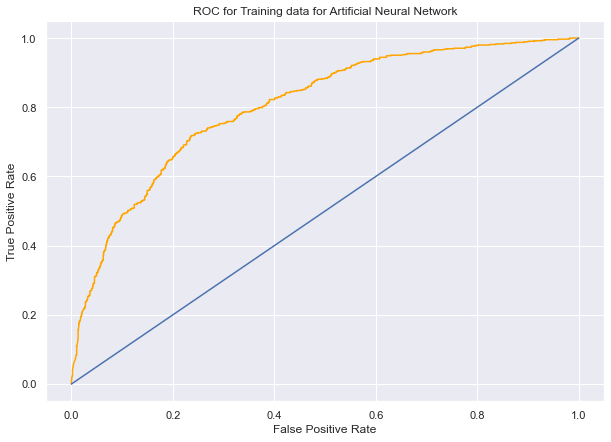

In [77]:
nn_train_fpr, nn_train_tpr,_= roc_curve(y_train,best_grid_mlp.predict_proba(X_train)[:,1])
plt.figure(figsize=(10,7))
print('Area under Curve (AUC) is', roc_auc_score(y_train,best_grid_mlp.predict_proba(X_train)[:,1]))
plt.plot(nn_train_fpr,nn_train_tpr, color='orange')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Training data for Artificial Neural Network')
plt.show()


### NEURAL NETWORK - AUC and ROC for the Testing data

Area under Curve (AUC) is 0.7929692706190495


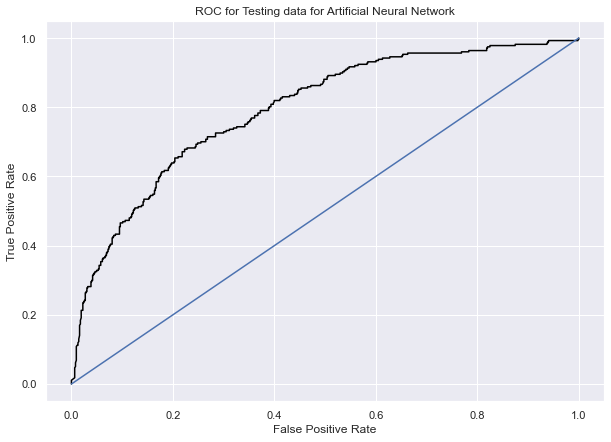

In [78]:
nn_test_fpr, nn_test_tpr,_= roc_curve(y_test,best_grid_mlp.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,7))
print('Area under Curve (AUC) is', roc_auc_score(y_test,best_grid_mlp.predict_proba(X_test)[:,1]))
plt.plot(nn_test_fpr,nn_test_tpr, color='black')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Testing data for Artificial Neural Network')
plt.show()

## Conclusions on each model (training and testing data) 

### Inferences on CART model (training and testing data) :

Accuracy on the Training Data: 79%

Accuracy on the Test Data: 77%

------------------------------

AUC on the Training Data: 82.5%

AUC on the Test Data: 80%

------------------------------

Accuracy, AUC, Precision and Recall for test data are almost inline with training data.
This proves no overfitting or underfitting has happened, and overall the model is a good for classification.

Also it is observed that there is imbalance in dataset which causes a low recall for prediction of 1s for both train and test datasets.

### Inferences on RANDOM FOREST model (training and testing data) :

Accuracy on the Training Data: 80%

Accuracy on the Test Data: 78%

------------------------------

AUC on the Training Data: 85.2%

AUC on the Test Data: 82%

------------------------------

Accuracy, AUC, Precision and Recall for test data are almost inline with training data.
This proves no overfitting or underfitting has happened, and overall the model is a good for classification.

Also it is observed that there is imbalance in dataset which causes a low recall for prediction of 1s for both train and test datasets.

### Inferences on ARTIFICIAL NEURAL NETWORK model (training and testing data) :

Accuracy on the Training Data: 77%

Accuracy on the Test Data: 76%

------------------------------

AUC on the Training Data: 80.4%

AUC on the Test Data: 79.3%

------------------------------

Accuracy, AUC, Precision and Recall for test data are almost inline with training data.
This proves no overfitting or underfitting has happened, and overall the model is a good for classification.

Also it is observed that there is imbalance in dataset which causes a low recall for prediction of 1s for both train and test datasets.

### Question 2.4) Final Model: Compare all the model and write an inference which model is best/optimized.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Answer 2.4:

### Combining all the performance matrices into a tabular format:

In [79]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
table = pd.DataFrame({'CART Train data':[0.79,0.825,0.53,0.70,0.60],
        'CART Test data':[0.77,0.80,0.51,0.67,0.58],
        'Random Forest Train data':[0.80,0.852,0.61,0.72,0.66],
        'Random Forest Test data':[0.78,0.82,0.57,0.68,0.62],
        'Neural Network Train data':[0.77,0.804,0.44,0.71,0.54],
        'Neural Network Test data':[0.76,0.793,0.43,0.68,0.53]},index=index)
round(table,2)

,CART Train data,CART Test data,Random Forest Train data,Random Forest Test data,Neural Network Train data,Neural Network Test data
Accuracy,0.79,0.77,0.80,0.78,0.77,0.76
AUC,0.82,0.80,0.85,0.82,0.80,0.79
Recall,0.53,0.51,0.61,0.57,0.44,0.43
Precision,0.70,0.67,0.72,0.68,0.71,0.68
F1 Score,0.60,0.58,0.66,0.62,0.54,0.53


### Comparing ROC curves for all models for training data


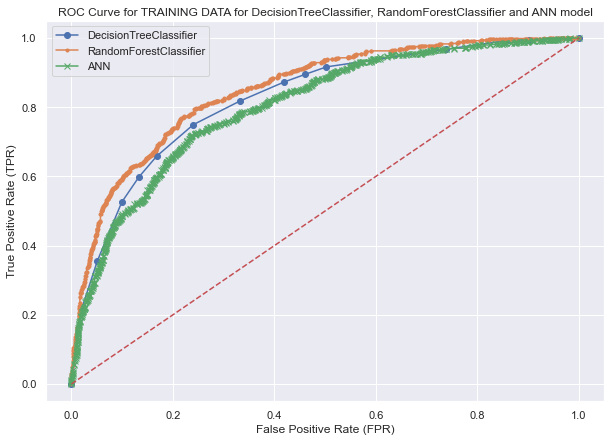

In [80]:
plt.figure(figsize=(10,7))

cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs_cart)
plt.plot(cart_train_fpr, cart_train_tpr, marker='o')

rf_train_fpr, rf_train_tpr,_=roc_curve(y_train,best_grid_rfcl.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr, rf_train_tpr, marker='.') 

nn_train_fpr, nn_train_tpr,_= roc_curve(y_train,best_grid_mlp.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr, nn_train_tpr, marker='x',) 


plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for TRAINING DATA for {} model'.format('DecisionTreeClassifier, RandomForestClassifier and ANN'))
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(models_names.values())
plt.show()

### Comparing ROC curves for all models for Testing data

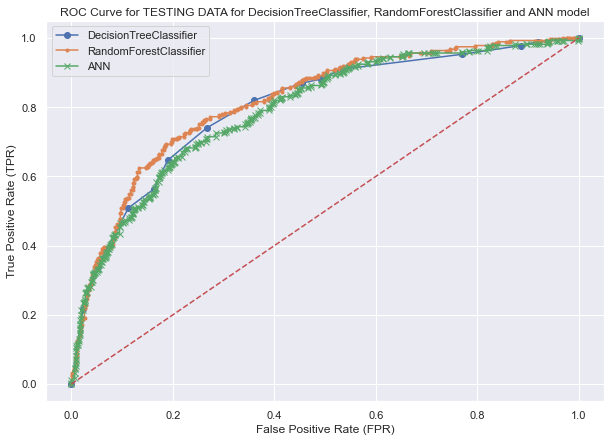

In [81]:
plt.figure(figsize=(10,7))

cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs_cart_t)
plt.plot(cart_test_fpr, cart_test_tpr, marker='o')

rf_test_fpr, rf_test_tpr,_=roc_curve(y_test,best_grid_rfcl.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr, rf_test_tpr, marker='.') 

nn_test_fpr, nn_test_tpr,_= roc_curve(y_test,best_grid_mlp.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr, nn_test_tpr, marker='x',) 


plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for TESTING DATA for {} model'.format('DecisionTreeClassifier, RandomForestClassifier and ANN'))
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(models_names.values())
plt.show()

#### Conclusion : Based on parameters like accuracy, AUC, precision, recall, F1 score of all 3 models , it is observed that Random Forest is more reliable than the other two models. At the same time, we may achieve better performance parameters on the ANN model by running more iterations/more layers or different algorithms, but this will take more computational resources and time. So, keeping an eye on the overall execution complexities and runtime, we may conclude that Random Forest is the best at this moment.

### Question 2.5) Inference: Based on the whole Analysis, what are the business insights and recommendations.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Answer 2.5:

First of all, from the observations, it is obvious that there is imbalance in dataset which causes a low recall for prediction of 1s for both train and test datasets. Therefore, it is recommended to collect more data related to the claims.

Some of the observations along with insights and recommendations have been documented below,

1. Agency 'JZI' and 'CWT' have less sales compared to other agencies. So, it is recommended to intensify marketing campaign for those agencies or assess new collaboration with other agencies.

2. From the dataset, it is observed that almost 90% - 95% of insurance sale is through online channel. Also, offline channel has most claimed numbers. The firm is advised to look into the high claimed numbers for Offline channel.

3. Most of the insurance sales are associated with travel to Asia. So, the firm may increase the price of their insurance policy to travel to Asia by looking at the seer number of travellers.

4. Also from the dataset, it is observed that the more sales happen via Agency than Airlines and the trend shows that the more claims are processed at Airlines. So, firm is advised to look into this peculiar pattern of claims.

5. From the classification models we ran, it is seen that the most important features in predicting whether claim will happen or not are Agency code and Product name. So, firm is recommended to focus on these two variables in planning revenue generation models in future.


